# COVID-19 Headlines

## Frankfurter Allgemeine Zeitung

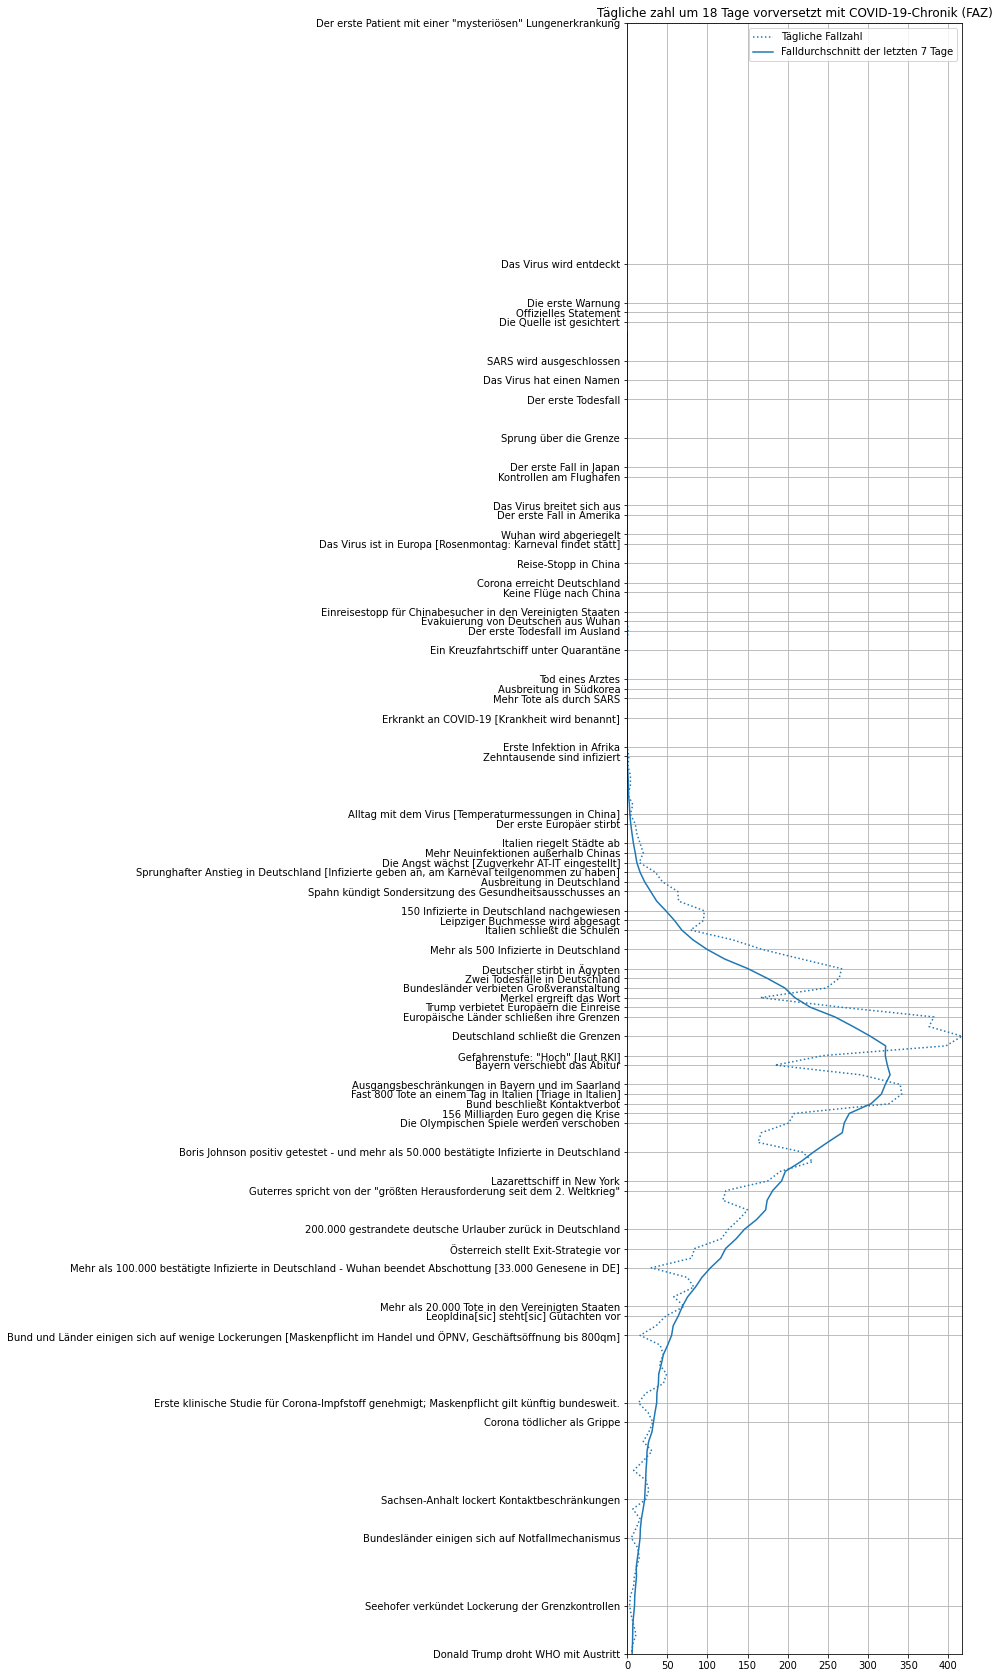

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scrape import entorb

cases = entorb.to_dataframe("DE-total")

news = pd.read_csv('data/chronic_de.tsv', sep="\t", usecols=['Datum', 'Ereignis'])
news['Datum'] = pd.to_datetime(news['Datum'], format='%Y-%m-%d')
news = news.set_index('Datum')

dt = 14 + 4
shifted = cases['Deaths_New'].shift(-dt)

fig, ax = plt.subplots()
ax.plot(shifted,
        shifted.index, 
        linestyle=':',
        label='Tägliche Fallzahl')
ax.plot(shifted.rolling('7D').mean(),
        shifted.index,
        color=ax.lines[0].get_color(),
        label='Falldurchschnitt der letzten 7 Tage')
ax.set_title("Tägliche zahl um %d Tage vorversetzt mit COVID-19-Chronik (FAZ)" % dt)
ax.set_yticks(news.index)
ax.set_ylim((news.index.max(), news.index.min()))
ax.set_yticklabels(news['Ereignis'])
ax.set_xlim(0,shifted.head(90).max())
ax.grid()
fig.set_size_inches(6,30)
fig.set_facecolor('w')
plt.legend(loc='upper right')
t = ax.set_ylabel('')